## Titanic Survival Prediction

------

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

*Now, we have to load the dataset

In [3]:
df= pd.read_csv(r"C:\Users\Prem\Downloads\Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


* This Titanic dataset consists of 418 rows and 12 columns

## Exploratory Data Analysis(EDA)

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


* Now, let's conduct the descriptive statistical analysis

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Checking for null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df["Age"] = df["Age"].fillna(df['Age'].mean())

In [11]:
df['Fare']= df['Fare'].fillna(df['Fare'].mean())

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [13]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [14]:
df["Embarked"].isnull().sum()

0

In [15]:
df["Embarked"]= df["Embarked"].map({"Q":0,"S":1,"C":2})

In [16]:
df["Embarked"]= df["Embarked"].astype(int)

In [17]:
df["Embarked"].value_counts()

1    270
2    102
0     46
Name: Embarked, dtype: int64

In [18]:
df['Sex']= df['Sex'].map({"male":0,"female":1}).astype(int)

In [19]:
df.Sex.value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [20]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1


* We can now drop unnecessary columns which are "PassengerId","name","cabin" and "ticket"

In [21]:
df_1= df.drop(["Name","PassengerId","Cabin","Ticket"],inplace=True, axis=1)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


### Changing the datatype

In [23]:
df['Age']= df['Age'].astype(int)

In [24]:
df['Fare']= df['Fare'].astype(int)

In [25]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Age         int32
SibSp       int64
Parch       int64
Fare        int32
Embarked    int32
dtype: object

In [26]:
df.groupby('Sex')["Age"].mean()

Sex
0    30.176692
1    30.217105
Name: Age, dtype: float64

In [27]:
df.groupby('Sex')[["Age","Survived","Pclass","SibSp","Parch","Fare"]].mean()

,Age,Survived,Pclass,SibSp,Parch,Fare
Sex,,,,,,
0,30.176692,0.0,2.334586,0.379699,0.274436,27.124060
1,30.217105,1.0,2.144737,0.565789,0.598684,49.289474


In [28]:
df.groupby('Embarked')[["Age","Sex","Fare","Survived","SibSp","Fare"]].mean()

,Age,Sex,Fare,Survived,SibSp,Fare
Embarked,,,,,,
0,29.652174,0.521739,10.282609,0.521739,0.195652,10.282609
1,28.925926,0.325926,27.851852,0.325926,0.500000,27.851852
2,33.784314,0.392157,65.823529,0.392157,0.421569,65.823529


### Data Visualization

Text(0.5, 1.0, 'Survival counts \n 0 for no, 1 for yes')

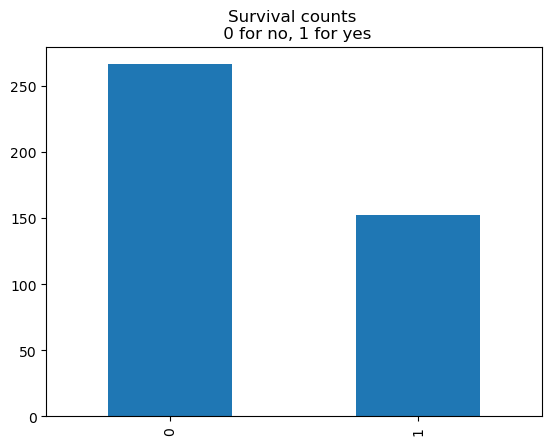

In [29]:
df['Survived'].value_counts().plot(kind='bar',)
plt.title('Survival counts \n 0 for no, 1 for yes')

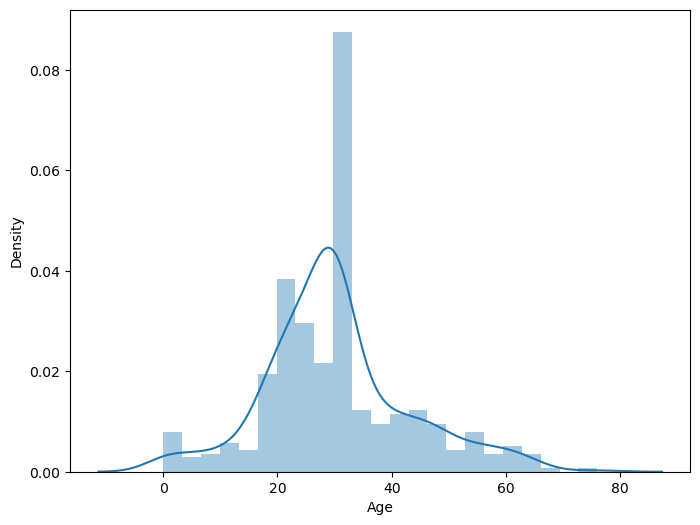

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'])
plt.show()

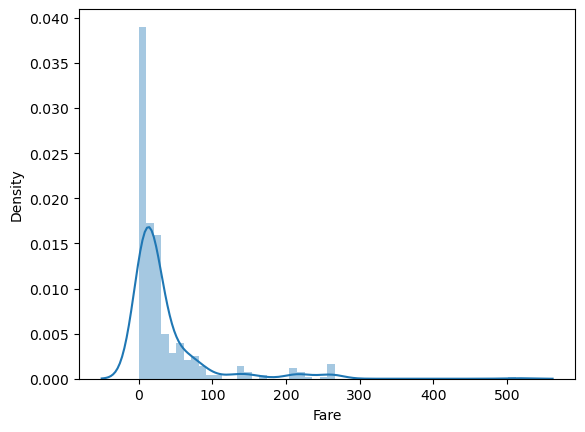

In [31]:
sns.distplot(df['Fare'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

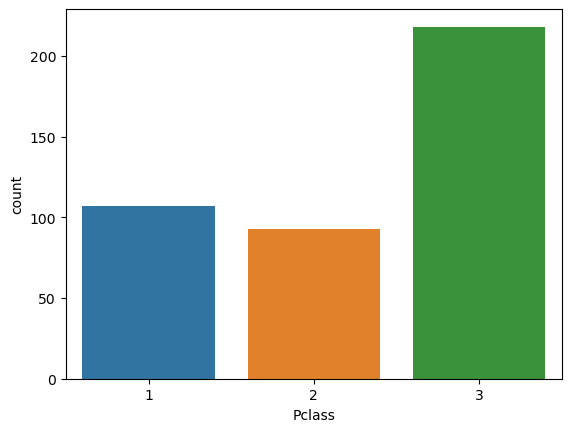

In [32]:
sns.countplot(df['Pclass'])

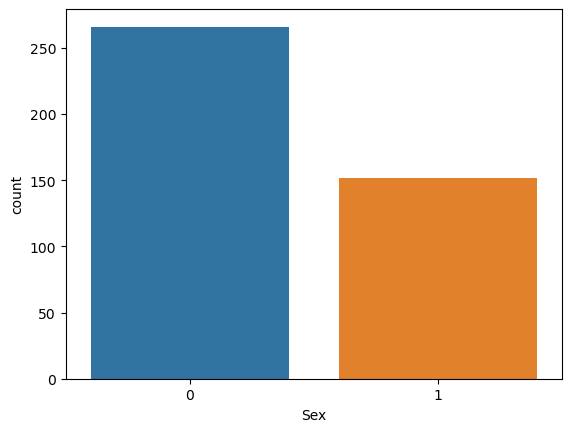

In [33]:
sns.countplot(df['Sex'])
plt.show()

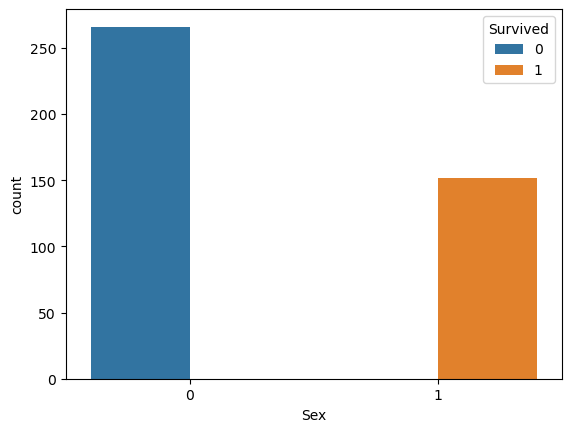

In [34]:
sns.countplot(x='Sex', hue= 'Survived', data=df)
plt.show()

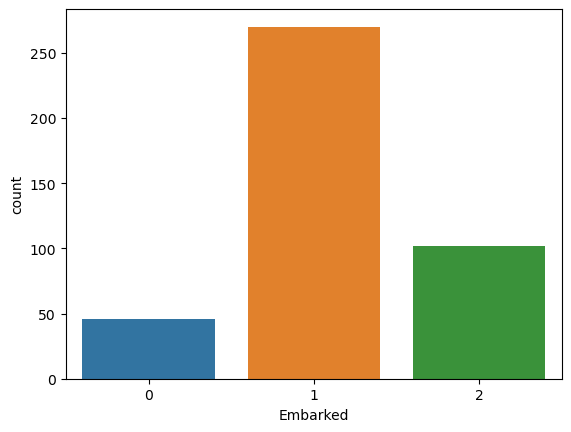

In [35]:
sns.countplot(df['Embarked'])
plt.show()

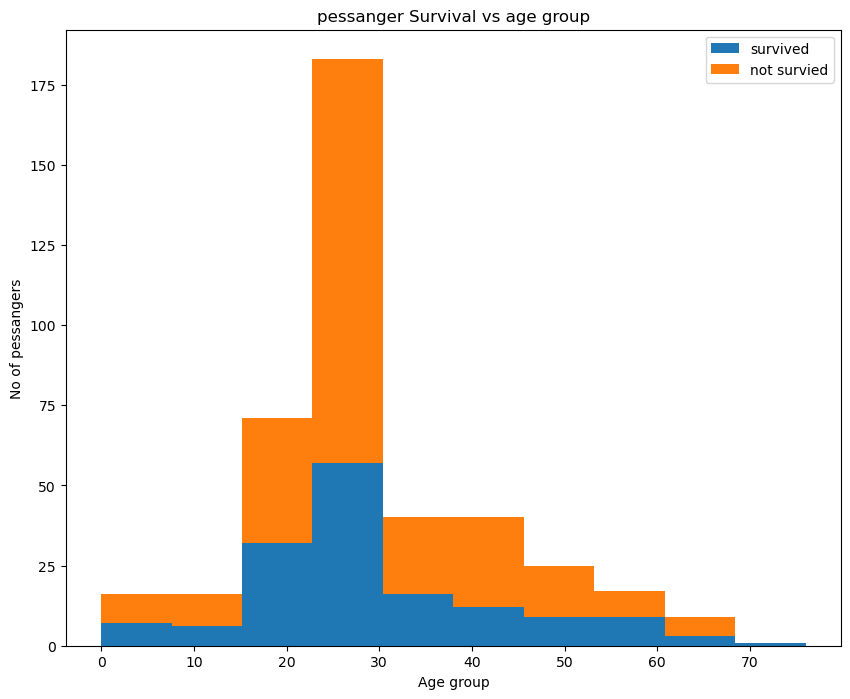

In [36]:
plt.figure(figsize=(10,8))
lables= ("survived", "not survied")
plt.hist(x=[df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], stacked=True, label=lables)
plt.title('pessanger Survival vs age group')
plt.xlabel("Age group")
plt.ylabel('No of pessangers')
plt.legend()
plt.show()

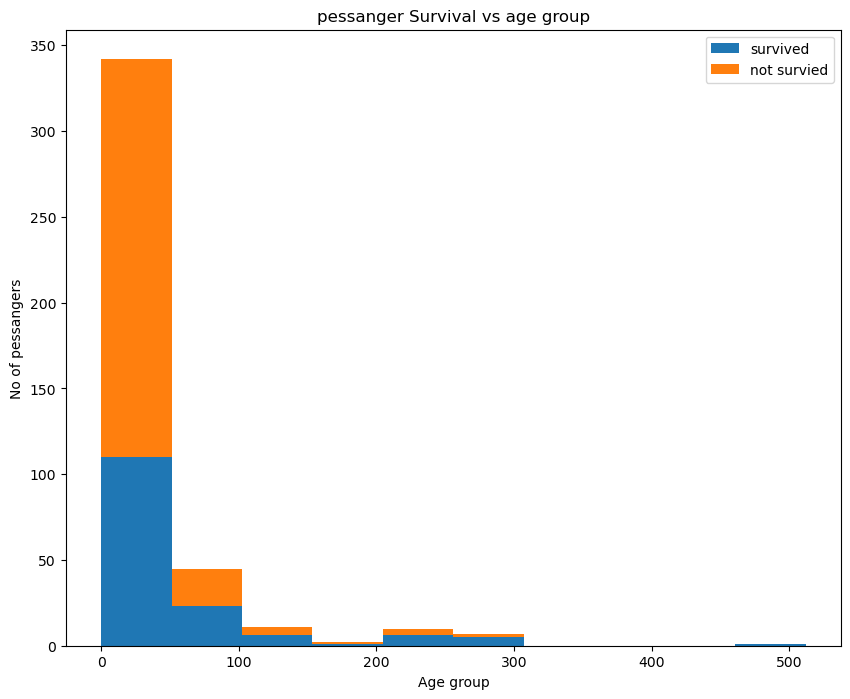

In [37]:
plt.figure(figsize=(10,8))
lables= ("survived", "not survied")
plt.hist(x=[df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, label=lables)
plt.title('pessanger Survival vs age group')
plt.xlabel("Age group")
plt.ylabel('No of pessangers')
plt.legend()
plt.show()

In [38]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191156,-0.037432
Pclass,-0.108615,1.000000,-0.108615,-0.443531,0.001087,0.018721,-0.577438,-0.372344
Sex,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191156,-0.037432
Age,0.001538,-0.443531,0.001538,1.000000,-0.079203,-0.045259,0.328407,0.127749
SibSp,0.099943,0.001087,0.099943,-0.079203,1.000000,0.306895,0.171884,0.041221
Parch,0.159120,0.018721,0.159120,-0.045259,0.306895,1.000000,0.230308,0.067474
Fare,0.191156,-0.577438,0.191156,0.328407,0.171884,0.230308,1.000000,0.315937
Embarked,-0.037432,-0.372344,-0.037432,0.127749,0.041221,0.067474,0.315937,1.000000


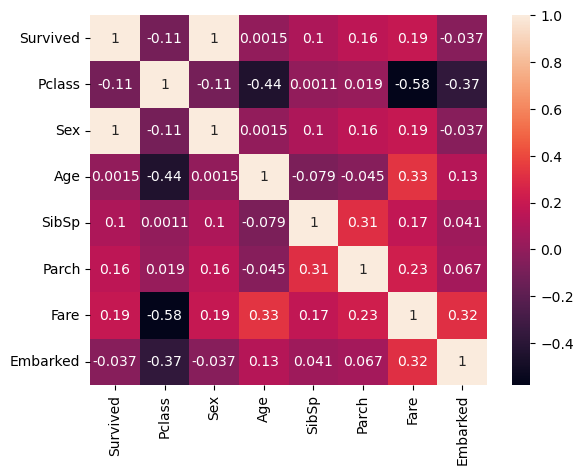

In [39]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [40]:
x= df.drop(['Survived'], axis=1)
y= df['Survived']

In [41]:
x.shape

(418, 7)

In [42]:
y.shape

(418,)

## Train Test split

In [43]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.20,random_state=4)

In [44]:
x_train.shape, x_test.shape

((334, 7), (84, 7))

In [45]:
y_train.shape, y_test.shape

((334,), (84,))

## Model Building

In [46]:
logreg= LogisticRegression()

In [47]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_pred=logreg.predict(x_test)

In [49]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [50]:
accuracy_score(y_pred, y_test)

1.0

In [51]:
confusion_matrix(y_test, y_pred)

array([[49,  0],
       [ 0, 35]], dtype=int64)

In [52]:
rf= RandomForestClassifier()

In [53]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
rf_pred =rf.predict(x_test)

In [55]:
accuracy_score(y_test, rf_pred)

1.0

In [56]:
logclassification=classification_report(y_test, y_pred)

In [60]:
print(logclassification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        35

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [58]:
rfclassification=classification_report(y_test, rf_pred)

In [61]:
print(rfclassification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        35

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

